**Import Packages**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Read data**

In [61]:
Titanic_df=pd.read_csv(r"C:\Users\jagan\Downloads\archive (3)\Titanic-Dataset.csv")
Titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Basic Checks**

In [62]:
Titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
Titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
Titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [65]:
Titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Drop the unwanted column**

In [66]:
Titanic_df.drop('PassengerId',axis=1,inplace=True)

In [67]:
Categorical_col=Titanic_df.select_dtypes(include='object')
Categorical_col

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [68]:
Num_col=Titanic_df.select_dtypes(exclude='object')
Num_col

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [69]:
Titanic_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [70]:
Titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Handling Missing Value**

In [71]:
for i in Num_col:
    med=Titanic_df[i].median()
    Titanic_df[i].fillna(med,inplace=True)

In [72]:
for i in Categorical_col:
    mode=Titanic_df[i].mode().values[0]
    Titanic_df[i].fillna(mode,inplace=True)

In [73]:
Titanic_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

- numerical columns missing value is filled by either mean or median

- categorical columns missing value can be filled by mode 

**convert categorical features into numerical using encoding**

In [74]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
for i in Categorical_col:
    Titanic_df[i]=Le.fit_transform(Titanic_df[i])

Titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,108,1,22.0,1,0,523,7.2500,47,2
1,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,1,3,353,0,26.0,0,0,669,7.9250,47,2
3,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,0,3,15,1,35.0,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,27.0,0,0,101,13.0000,47,2
887,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,0,3,413,0,28.0,1,2,675,23.4500,47,2
889,1,1,81,1,26.0,0,0,8,30.0000,60,0


**Normalize/standardize the numerical features**

In [75]:
# Using Standardisation
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in Titanic_df.columns:
    Titanic_df[i]=ss.fit_transform(Titanic_df[[i]])

Titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-0.789272,0.827377,-1.310217,0.737695,-0.565736,0.432793,-0.473674,0.918966,-0.502445,-0.281881,0.585954
1,1.266990,-1.566107,-0.991410,-1.355574,0.663861,0.432793,-0.473674,1.282625,0.786845,1.161545,-1.942303
2,1.266990,0.827377,-0.357685,-1.355574,-0.258337,-0.474545,-0.473674,1.646283,-0.488854,-0.281881,0.585954
3,1.266990,-1.566107,-0.672604,-1.355574,0.433312,0.432793,-0.473674,-1.442322,0.420730,0.057748,0.585954
4,-0.789272,0.827377,-1.671790,0.737695,0.433312,-0.474545,-0.473674,0.664904,-0.486337,-0.281881,0.585954
...,...,...,...,...,...,...,...,...,...,...,...
886,-0.789272,-0.369365,0.400452,0.737695,-0.181487,-0.474545,-0.473674,-1.183277,-0.386671,-0.281881,0.585954
887,1.266990,-1.566107,-0.552079,-1.355574,-0.796286,-0.474545,-0.473674,-1.616678,-0.044381,-1.003594,0.585954
888,-0.789272,0.827377,-0.124412,-1.355574,-0.104637,0.432793,2.008933,1.676173,-0.176263,-0.281881,0.585954
889,1.266990,-1.566107,-1.415189,0.737695,-0.258337,-0.474545,-0.473674,-1.646568,-0.044381,0.270017,-1.942303


**Visualize outliers using boxplots and remove them**

**Boxplot**

- it is used to find the outliers

- Q3+1.5*(Q3-Q1)

- Q1-1.5*(Q3-Q1)

**Visualize the outlier**

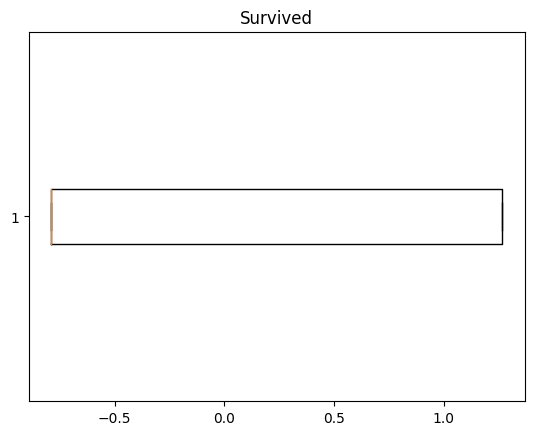

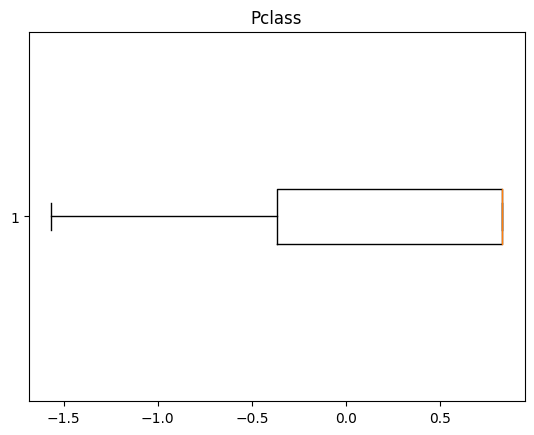

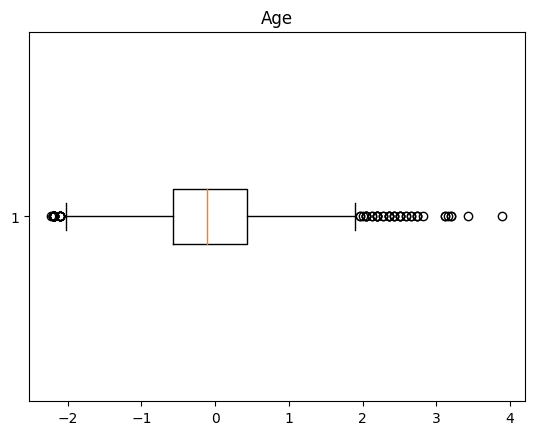

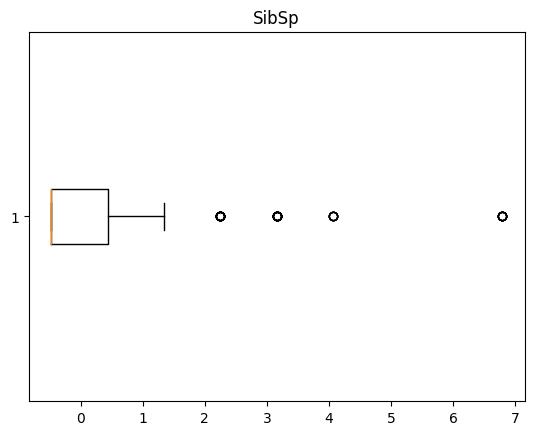

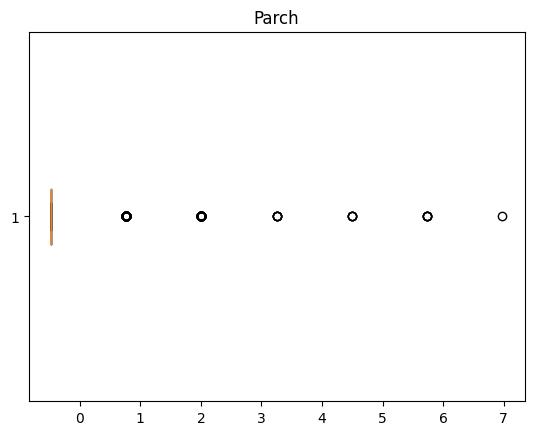

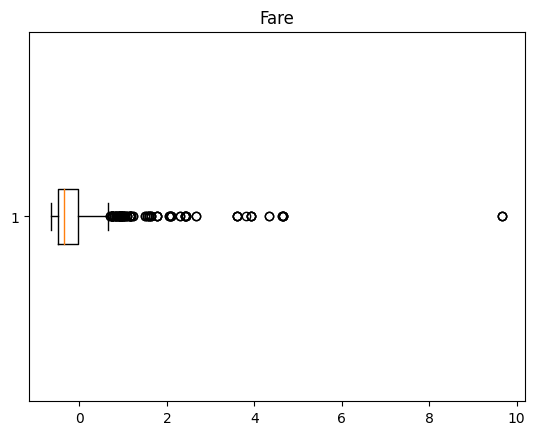

In [76]:
for i in Num_col:
    plt.title(i)
    plt.boxplot(Titanic_df[i],vert=False)
    plt.show()

**Remove the outlier**

In [77]:
for i in Num_col:
    q1=np.quantile(Titanic_df[i],0.25)
    q3=np.quantile(Titanic_df[i],0.75)
    lb=q1-1.5*(q3-q1)
    ub=q3+1.5*(q3-q1)
    med=Titanic_df[i].median()
    con1=Titanic_df[i]<lb
    con2=Titanic_df[i]>ub
    con3=con1|con2
    true=med
    false=Titanic_df[i]
    Titanic_df[i]=np.where(con3,true,false)

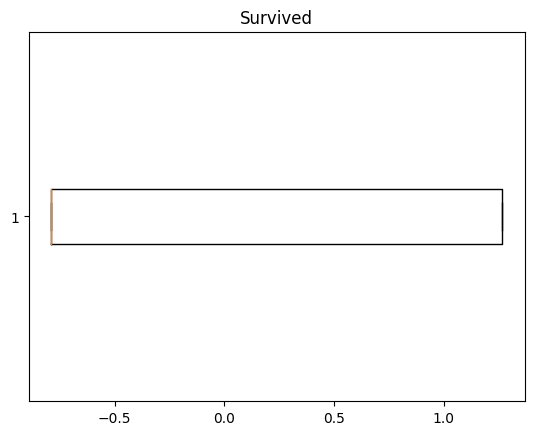

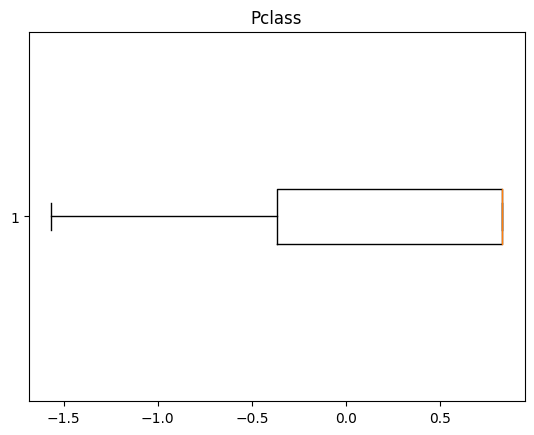

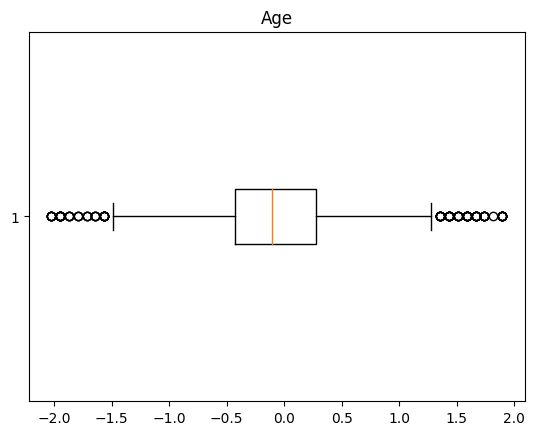

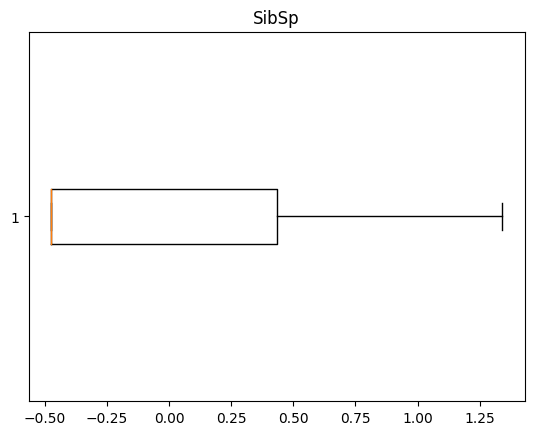

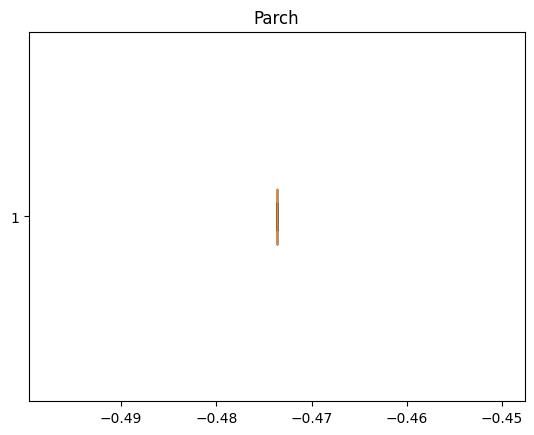

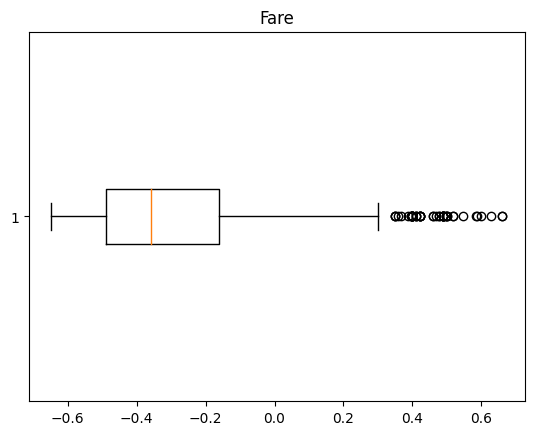

In [78]:
for i in Num_col:
    plt.title(i)
    plt.boxplot(Titanic_df[i],vert=False)
    plt.show()